In [16]:
import urllib.request
import json
import os
from bs4 import BeautifulSoup
from jsonmerge import merge
import re


In [17]:
# CREATE SOUP
def soupify(url):

    # Open the request and create the soup
    response = urllib.request.urlopen(url)
    soup = BeautifulSoup(response.read(), "lxml")
    return soup


In [18]:
def get_speech_urls(url):
    # Get the urls and add the base URL to each in the list
    soup=soupify(url)
    try:
        urls = soup.findAll('a',href=re.compile('(documents)'))[3:]
        baseurl = 'https://www.presidency.ucsb.edu'
        urls = map(lambda x: baseurl + x['href'], list(urls))
        
        url_list=[]
        for url in urls:
            url_list.append(url)
        return url_list
    except:
        print("Failed trying again")
        return get_speech_urls(url)

In [38]:
candidate=soup.findAll('h3')[0].text
candidate

'John McCain'

In [40]:
speech=soup.findAll('h1')[0].text
speech

'Speech to GOPAC'

In [59]:
date=soup.find(property="dc:date").string
date

'November 16, 2006'

In [117]:
text=soup.find('div', attrs={'class': "field-docs-content"}).text.replace('\n','')
text

'Thank you for this opportunity to talk about the future of our Party and our country.The voters obviously wanted to get our attention last week. While I would have preferred a gentler reproach than the one they delivered, I\'m not discouraged nor should any of us be. Democrats had a good election night. We did not. But no defeat is permanent. And parties, just like individuals, show their character in adversity. Now, is the occasion to show ours.The election was not an affirmation of the other party\'s program. Try as hard as I could, I couldn\'t find much evidence that my Democratic friends were offering anything that resembled a coherent platform or principled leadership on the critical issues that confront us today.Nor do I believe Americans rejected our values and governing philosophy. On the contrary, I think they rejected us because they felt we had come to value our incumbency over our principles, and partisanship, from both parties, was no longer a contest of ideas, but an eve

In [19]:
def get_script(url):
    soup = soupify(url)
    candidate=soup.findAll('h3')[0].text
    speech=soup.findAll('h1')[0].text
    date=soup.find(property="dc:date").string
    text=soup.find('div', attrs={'class': "field-docs-content"}).text.replace('\n',' ').strip()
    
    return {"candidate": candidate, "speech title": speech, 'date':date, 'text':text}

In [194]:
get_script('https://www.presidency.ucsb.edu/documents/speech-gopac')

{'candidate': 'John McCain',
 'speech title': 'Speech to GOPAC',
 'date': 'November 16, 2006',
 'text': 'Thank you for this opportunity to talk about the future of our Party and our country. The voters obviously wanted to get our attention last week. While I would have preferred a gentler reproach than the one they delivered, I\'m not discouraged nor should any of us be. Democrats had a good election night. We did not. But no defeat is permanent. And parties, just like individuals, show their character in adversity. Now, is the occasion to show ours. The election was not an affirmation of the other party\'s program. Try as hard as I could, I couldn\'t find much evidence that my Democratic friends were offering anything that resembled a coherent platform or principled leadership on the critical issues that confront us today. Nor do I believe Americans rejected our values and governing philosophy. On the contrary, I think they rejected us because they felt we had come to value our incumb

In [20]:
def do_scrape(max_page_count):

    # Scrape the script from each URL and add to a list
    speeches = []
    
    # Stores number of pages scraped
    page_count = 0

    while page_count < max_page_count:

        print("\n \n ---------------PAGE COUNT: ", page_count)
        # Url of search page
        base_url1 = 'https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=01-01-1995&to%5Bdate%5D=&person2=&category2%5B0%5D=&category2%5B1%5D=63&items_per_page=100'


        # Get the speeches list from the main page
        urls=get_speech_urls(base_url1 + "&page=" + str(page_count))

        for url in urls:
            print(url)
            speeches.append(get_script(url))
            
        page_count+=1

    
    # Write the output to a file

    try:
        with open("Speeches1.json", 'w') as json_file:
            json.dump(speeches, json_file, indent=4)
        return 'Speech document created.'
    except:
        return 'Could not create episode document.'

In [21]:
do_scrape(20)


 
 ---------------PAGE COUNT:  0
https://www.presidency.ucsb.edu/documents/remarks-announcing-candidacy-for-the-republican-presidential-nomination-0
https://www.presidency.ucsb.edu/documents/remarks-los-angeles-hollywood-speech
https://www.presidency.ucsb.edu/documents/remarks-the-united-states-conference-mayors-miami
https://www.presidency.ucsb.edu/documents/remarks-the-iowa-straw-poll-ames
https://www.presidency.ucsb.edu/documents/remarks-the-american-legion-convention-indianapolis
https://www.presidency.ucsb.edu/documents/remarks-the-econmoic-club-chicago
https://www.presidency.ucsb.edu/documents/excerpt-remarks-concord-new-hampshire
https://www.presidency.ucsb.edu/documents/remarks-family-forum-event-iowa
https://www.presidency.ucsb.edu/documents/interview-who-radio
https://www.presidency.ucsb.edu/documents/excerpts-remarks-following-the-iowa-caucuses
https://www.presidency.ucsb.edu/documents/remarks-the-hudson-new-hampshire-chamber-commerce
https://www.presidency.ucsb.edu/documen

https://www.presidency.ucsb.edu/documents/remarks-new-york-city-0

 
 ---------------PAGE COUNT:  1
https://www.presidency.ucsb.edu/documents/remarks-the-american-federation-teachers-0
https://www.presidency.ucsb.edu/documents/remarks-the-democratic-leadership-conference-national-conversation
https://www.presidency.ucsb.edu/documents/remarks-announcing-selection-dick-cheney-vice-presidential-running-mate
https://www.presidency.ucsb.edu/documents/remarks-announcing-selection-joe-lieberman-vice-presidential-running-mate
https://www.presidency.ucsb.edu/documents/telephone-remarks-the-international-union-electronic-electrical-salaried-machine-and
https://www.presidency.ucsb.edu/documents/remarks-chevy-chase-maryland
https://www.presidency.ucsb.edu/documents/remarks-muskegon-michigan
https://www.presidency.ucsb.edu/documents/remarks-kissimmee-florida
https://www.presidency.ucsb.edu/documents/address-conceding-the-2000-presidential-election
https://www.presidency.ucsb.edu/documents/address-a

https://www.presidency.ucsb.edu/documents/remarks-orlando-florida-4
https://www.presidency.ucsb.edu/documents/remarks-east-mt-zion-baptist-church-cleveland-ohio
https://www.presidency.ucsb.edu/documents/remarks-santa-fe-new-mexico
https://www.presidency.ucsb.edu/documents/remarks-the-national-conference-the-american-association-retired-people-las-vegas
https://www.presidency.ucsb.edu/documents/remarks-milwaukee-area-technical-college
https://www.presidency.ucsb.edu/documents/radio-address-the-nation-6
https://www.presidency.ucsb.edu/documents/remarks-xenia-high-school-xenia-ohio
https://www.presidency.ucsb.edu/documents/remarks-teresa-heinz-kerry-the-lion-judah-conference-washington-dc
https://www.presidency.ucsb.edu/documents/remarks-tampa-florida-7
https://www.presidency.ucsb.edu/documents/remarks-wilkes-barre-pennsylvania-1
https://www.presidency.ucsb.edu/documents/remarks-waterloo-iowa-0
https://www.presidency.ucsb.edu/documents/remarks-columbus-ohio-9

 
 ---------------PAGE COUNT

https://www.presidency.ucsb.edu/documents/remarks-the-detroit-economic-club-0
https://www.presidency.ucsb.edu/documents/remarks-the-massachusetts-citizens-for-life-mothers-day-pioneer-valley-dinner
https://www.presidency.ucsb.edu/documents/excerpts-governor-mitt-romneys-commencement-address-hillsdale-college
https://www.presidency.ucsb.edu/documents/interview-with-tim-russert-nbc-news-meet-the-press-3
https://www.presidency.ucsb.edu/documents/remarks-the-death-jerry-falwell-columbia-south-carolina
https://www.presidency.ucsb.edu/documents/speech-new-america-foundation
https://www.presidency.ucsb.edu/documents/excerpts-remarks-orlando-florida
https://www.presidency.ucsb.edu/documents/remarks-southern-new-hampshire-university-commencement
https://www.presidency.ucsb.edu/documents/speech-dillard-university-new-orleans
https://www.presidency.ucsb.edu/documents/remarks-miami-expanding-pre-k
https://www.presidency.ucsb.edu/documents/address-the-oklahoma-state-legislature
https://www.presiden

https://www.presidency.ucsb.edu/documents/remarks-washington-dc-tax-fairness-for-the-middle-class
https://www.presidency.ucsb.edu/documents/excerpts-remarks-reporters-london-england
https://www.presidency.ucsb.edu/documents/address-the-national-rifle-association
https://www.presidency.ucsb.edu/documents/remarks-the-mackinac-republican-leadership-conference
https://www.presidency.ucsb.edu/documents/address-the-mackinac-republican-leadership-conference
https://www.presidency.ucsb.edu/documents/address-the-hudson-institute-washington-dc
https://www.presidency.ucsb.edu/documents/remarks-the-howard-university-convocation-washington-dc
https://www.presidency.ucsb.edu/documents/address-the-2007-hispanic-business-expo-orlando-florida
https://www.presidency.ucsb.edu/documents/remarks-the-national-rifle-associations-celebration-american-values-conference-washington
https://www.presidency.ucsb.edu/documents/remarks-chicago-new-beginning
https://www.presidency.ucsb.edu/documents/remarks-the-carneg

https://www.presidency.ucsb.edu/documents/interview-with-tim-russert-nbc-news-meet-the-press-1
https://www.presidency.ucsb.edu/documents/remarks-the-center-for-hydrogen-research-aiken-county-south-carolina
https://www.presidency.ucsb.edu/documents/excerpt-remarks-reporters-san-francisco-california
https://www.presidency.ucsb.edu/documents/speech-education-and-jobs-america
https://www.presidency.ucsb.edu/documents/remarks-tampa-florida-3
https://www.presidency.ucsb.edu/documents/remarks-the-every-county-counts-kickoff-council-bluffs-iowa
https://www.presidency.ucsb.edu/documents/excerpts-remarks-ames-iowa
https://www.presidency.ucsb.edu/documents/interview-with-tim-russert-nbc-news-meet-the-press-7
https://www.presidency.ucsb.edu/documents/remarks-the-the-hillary-i-know-event-johnston-iowa
https://www.presidency.ucsb.edu/documents/speech-new-vision-foreign-and-domestic
https://www.presidency.ucsb.edu/documents/remarks-the-foreign-policy-forum-des-moines-iowa
https://www.presidency.ucsb.

https://www.presidency.ucsb.edu/documents/remarks-the-virginia-jefferson-jackson-dinner-0
https://www.presidency.ucsb.edu/documents/remarks-the-conservative-political-action-conference-3
https://www.presidency.ucsb.edu/documents/remarks-following-the-maryland-virginia-and-district-columbia-primaries
https://www.presidency.ucsb.edu/documents/remarks-following-the-maryland-virginia-and-district-columbia-primaries-0
https://www.presidency.ucsb.edu/documents/remarks-following-the-maryland-virginia-and-district-columbia-primaries-1
https://www.presidency.ucsb.edu/documents/remarks-following-the-maryland-virginia-and-district-columbia-primaries-2
https://www.presidency.ucsb.edu/documents/remarks-janesville-wisconsin-keeping-americas-promise
https://www.presidency.ucsb.edu/documents/remarks-town-hall-with-general-motors-employees-warren-ohio
https://www.presidency.ucsb.edu/documents/remarks-the-wisconsin-founders-day-gala-milwaukee
https://www.presidency.ucsb.edu/documents/interview-with-geor

https://www.presidency.ucsb.edu/documents/interview-with-tim-russert-nbc-news-meet-the-press-10
https://www.presidency.ucsb.edu/documents/interview-with-katie-couric-cbs-news-3
https://www.presidency.ucsb.edu/documents/interview-with-katie-couric-cbs-news-4
https://www.presidency.ucsb.edu/documents/interview-with-john-roberts-cnns-american-morning-0
https://www.presidency.ucsb.edu/documents/remarks-following-the-indiana-and-north-carolina-primaries
https://www.presidency.ucsb.edu/documents/remarks-following-the-indiana-and-north-carolina-primaries-0
https://www.presidency.ucsb.edu/documents/remarks-judicial-philosophy-wake-forest-university-winston-salem-north-carolina
https://www.presidency.ucsb.edu/documents/remarks-john-mccain-his-vision-for-defending-the-freedom-and-dignity-the-worlds-vulnerable
https://www.presidency.ucsb.edu/documents/interview-with-wolf-blitzer-cnns-the-situation-room-0
https://www.presidency.ucsb.edu/documents/remarks-economic-discussion-beaverton-oregon
https:

https://www.presidency.ucsb.edu/documents/remarks-the-clinton-obama-breakfast-fundraiser-new-york-city
https://www.presidency.ucsb.edu/documents/remarks-the-womens-economic-security-town-hall-fairfax-virginia
https://www.presidency.ucsb.edu/documents/remarks-dayton-ohio-5
https://www.presidency.ucsb.edu/documents/senator-mccains-weekly-radio-address-5
https://www.presidency.ucsb.edu/documents/remarks-the-2008-national-council-la-raza-annual-meeting-san-diego-california-0
https://www.presidency.ucsb.edu/documents/remarks-via-satellite-the-80th-convention-the-american-federation-teachers
https://www.presidency.ucsb.edu/documents/interview-with-fareed-zakaria-cnns-global-public-square
https://www.presidency.ucsb.edu/documents/remarks-the-99th-annual-convention-the-naacp-cincinnati-ohio-0
https://www.presidency.ucsb.edu/documents/remarks-the-2008-national-council-la-raza-annual-meeting-san-diego-california
https://www.presidency.ucsb.edu/documents/remarks-washington-dc
https://www.presiden

https://www.presidency.ucsb.edu/documents/remarks-the-congressional-hispanic-caucus-institute-gala-washington-dc
https://www.presidency.ucsb.edu/documents/interview-with-charlie-gibson-abc-news-part-1-3
https://www.presidency.ucsb.edu/documents/remarks-dover-new-hampshire
https://www.presidency.ucsb.edu/documents/senator-mccains-weekly-radio-address-1
https://www.presidency.ucsb.edu/documents/remarks-saint-clair-shores-michigan
https://www.presidency.ucsb.edu/documents/interview-with-peter-cook-bloombergs-money-and-politics
https://www.presidency.ucsb.edu/documents/remarks-tampa-florida-5
https://www.presidency.ucsb.edu/documents/interview-with-john-roberts-cnns-american-morning
https://www.presidency.ucsb.edu/documents/remarks-golden-colorado
https://www.presidency.ucsb.edu/documents/interview-with-kiran-chetry-cnns-american-morning
https://www.presidency.ucsb.edu/documents/interview-with-sean-hannity-fox-news-part-1-2
https://www.presidency.ucsb.edu/documents/remarks-the-general-moto

https://www.presidency.ucsb.edu/documents/excerpts-remarks-fredericksburg-virginia
https://www.presidency.ucsb.edu/documents/interview-with-piper-palin-sean-hannity-fox-news-hannity-colmes
https://www.presidency.ucsb.edu/documents/remarks-dayton-ohio-3
https://www.presidency.ucsb.edu/documents/remarks-canton-ohio-presenting-presidential-campaign-closing-argument
https://www.presidency.ucsb.edu/documents/remarks-after-holding-meeting-the-state-the-economy-cleveland-ohio
https://www.presidency.ucsb.edu/documents/remarks-hershey-pennsylvania-1
https://www.presidency.ucsb.edu/documents/interview-with-cindy-mccain-sean-hannity-fox-news-hannity-colmes
https://www.presidency.ucsb.edu/documents/remarks-chester-pennsylvania
https://www.presidency.ucsb.edu/documents/remarks-miami-florida-2
https://www.presidency.ucsb.edu/documents/remarks-toledo-ohio-0
https://www.presidency.ucsb.edu/documents/remarks-raleigh-north-carolina
https://www.presidency.ucsb.edu/documents/interview-with-larry-king-cnn


https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-4
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-3
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-new-york-city-1
https://www.presidency.ucsb.edu/documents/remarks-announcing-candidacy-for-president-charleston-south-carolina
https://www.presidency.ucsb.edu/documents/remarks-the-112th-veterans-foreign-wars-national-convention-san-antonio-texas
https://www.presidency.ucsb.edu/documents/remarks-republican-national-hispanic-assembly-tampa-florida
https://www.presidency.ucsb.edu/documents/remarks-response-president-obamas-address-joint-address-congress
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-0
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-1
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-f

https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-1
https://www.presidency.ucsb.edu/documents/remarks-tampa-following-the-florida-primary
https://www.presidency.ucsb.edu/documents/remarks-orlando-following-the-florida-primary
https://www.presidency.ucsb.edu/documents/remarks-henderson-nevada-following-the-florida-primary
https://www.presidency.ucsb.edu/documents/remarks-las-vegas-nevada-following-the-florida-primary
https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-0
https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-chevy-chase-maryland
https://www.presidency.ucsb.edu/documents/remarks-colorado-following-the-nevada-caucuses
https://www.presidency.ucsb.edu/documents/remarks-arden-hills-minnesota-following-the-nevada-caucuses
https://www.presidency.ucsb.edu/documents/remarks-las-vegas-following-the-nevada-caucuses
https://www.presidency.ucsb.edu/documents/press-conference-las-vegas-fo

https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-richmond-virginia
https://www.presidency.ucsb.edu/documents/remarks-lansing-michigan-new-course-for-america
https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-seattle-washington
https://www.presidency.ucsb.edu/documents/remarks-obama-victory-2012-fundraiser-seattle
https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-studio-city-california
https://www.presidency.ucsb.edu/documents/commencement-address-liberty-university-lynchburg-virginia
https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-new-york-city-18
https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-new-york-city-19
https://www.presidency.ucsb.edu/documents/remarks-des-moines-iowa-6
https://www.presidency.ucsb.edu/documents/remarks-fundraising-event-boca-raton-florida
https://www.presidency.ucsb.edu/documents/video

https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-chicago-4
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-chicago-illinois
https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-chicago-3
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-council-bluffs-iowa
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-boone-iowa
https://www.presidency.ucsb.edu/documents/remarks-chillicothe-ohio-2
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-oskaloosa-iowa
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-marshalltown-iowa-0
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-waterloo-iowa
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-dubuque-iowa-0
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-davenport-iowa-0
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-windham-new-hampshire
https

https://www.presidency.ucsb.edu/documents/remarks-campaign-event-newport-news-virginia
https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-san-francisco-california-0
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-san-francisco
https://www.presidency.ucsb.edu/documents/remarks-campaign-event-van-meter-iowa
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-columbus-ohio-1
https://www.presidency.ucsb.edu/documents/remarks-with-senator-rob-portman-and-governor-chris-christie-campaign-event-cuyahoga-falls
https://www.presidency.ucsb.edu/documents/remarks-campaign-event-mount-vernon-ohio
https://www.presidency.ucsb.edu/documents/remarks-with-new-jersey-governor-chris-christie-campaign-event-delaware-ohio
https://www.presidency.ucsb.edu/documents/remarks-campaign-event-sidney-ohio
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-miami-florida
https://www.presidency.ucsb.edu/documents/remarks-campaign-event-ashev

https://www.presidency.ucsb.edu/documents/remarks-democratic-senatorial-campaign-committee-lunch-denver-colorado
https://www.presidency.ucsb.edu/documents/remarks-democratic-congressional-campaign-committee-dinner-dallas-texas
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-austin-texas-2
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-seattle-washington-0
https://www.presidency.ucsb.edu/documents/remarks-democratic-congressional-campaign-committee-luncheon-los-altos-hills-california
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-los-angeles-california-4
https://www.presidency.ucsb.edu/documents/remarks-democratic-senatorial-campaign-committee-fundraiser-tisbury-massachusetts
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-purchase-new-york
https://www.presidency.ucsb.edu/documents/remarks-democratic-congressional-c

https://www.presidency.ucsb.edu/documents/remarks-the-st-pauls-school-advanced-studies-program-concord-new-hampshire
https://www.presidency.ucsb.edu/documents/excerpt-remarks-ames-iowa
https://www.presidency.ucsb.edu/documents/remarks-new-york-city-reforming-wall-street
https://www.presidency.ucsb.edu/documents/remarks-the-national-urban-league-conference-fort-lauderdale-florida-0
https://www.presidency.ucsb.edu/documents/remarks-with-joseph-stiglitz-james-galbraith-and-stephanie-kelton-discussion-the-greek
https://www.presidency.ucsb.edu/documents/remarks-the-national-urban-league-conference-fort-lauderdale-florida
https://www.presidency.ucsb.edu/documents/remarks-the-redstate-gathering-atlanta-georgia

 
 ---------------PAGE COUNT:  15
https://www.presidency.ucsb.edu/documents/remarks-national-nurses-united-endorsement-oakland-california
https://www.presidency.ucsb.edu/documents/remarks-the-ronald-reagan-presidential-library-simi-valley-california
https://www.presidency.ucsb.edu/docu

https://www.presidency.ucsb.edu/documents/interview-with-john-dickerson-cbs-news-face-the-nation-1
https://www.presidency.ucsb.edu/documents/interview-with-chuck-todd-nbc-news-meet-the-press-2
https://www.presidency.ucsb.edu/documents/interview-with-jake-tapper-cnns-state-the-union-0
https://www.presidency.ucsb.edu/documents/interview-with-rachel-maddow-msnbc
https://www.presidency.ucsb.edu/documents/remarks-concord-following-the-new-hampshire-primary
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-reception-atherton-california
https://www.presidency.ucsb.edu/documents/remarks-democratic-hope-fund-reception-los-angeles-california
https://www.presidency.ucsb.edu/documents/remarks-democratic-hope-fund-dinner-los-angeles-california
https://www.presidency.ucsb.edu/documents/interview-with-chris-wallace-fox-news-sunday-2
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-for-jeb-bush-charleston-south-carolina
https://www.presidency.ucsb.edu/docu

https://www.presidency.ucsb.edu/documents/remarks-the-mississippi-coliseum-jackson-mississippi
https://www.presidency.ucsb.edu/documents/remarks-the-xfinity-arena-everett-washington
https://www.presidency.ucsb.edu/documents/remarks-immigration-the-phoenix-convention-center-phoenix-arizona
https://www.presidency.ucsb.edu/documents/remarks-the-american-legion-cincinnati-ohio
https://www.presidency.ucsb.edu/documents/remarks-the-roberts-centre-wilmington-ohio
https://www.presidency.ucsb.edu/documents/remarks-great-faith-international-ministries-detroit-michigan
https://www.presidency.ucsb.edu/documents/remarks-rally-the-greenville-convention-center-greenville-north-carolina
https://www.presidency.ucsb.edu/documents/remarks-the-union-league-philadelphia-philadelphia-pennsylvania
https://www.presidency.ucsb.edu/documents/remarks-the-cleveland-arts-and-social-sciences-academy-cleveland-ohio
https://www.presidency.ucsb.edu/documents/remarks-the-11th-annual-values-voter-summit-washington-dc-om

https://www.presidency.ucsb.edu/documents/remarks-smale-riverfront-park-cincinnati-ohio
https://www.presidency.ucsb.edu/documents/remarks-the-kent-state-student-recreation-center-kent-ohio
https://www.presidency.ucsb.edu/documents/remarks-macomb-community-college-south-campus-warren-michigan
https://www.presidency.ucsb.edu/documents/remarks-obamacare-valley-forge-pennsylvania
https://www.presidency.ucsb.edu/documents/remarks-the-central-florida-fairgrounds-orlando-florida
https://www.presidency.ucsb.edu/documents/remarks-the-bayfront-park-amphitheater-miami-florida
https://www.presidency.ucsb.edu/documents/remarks-pasco-hernando-state-college-east-campus-dade-city-florida
https://www.presidency.ucsb.edu/documents/remarks-coastal-credit-union-music-park-raleigh-north-carolina
https://www.presidency.ucsb.edu/documents/remarks-pitt-community-college-winterville-north-carolina
https://www.presidency.ucsb.edu/documents/remarks-eastern-market-detroit-michigan
https://www.presidency.ucsb.edu/

'Speech document created.'

In [22]:
import pandas as pd
import numpy as np
from spacy import displacy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [26]:
# Load the JSON file into a data frame
df = pd.read_json("Speeches1.json", orient='columns')

In [27]:
df.head()

,candidate,date,speech title,text
0,Robert Dole,1995-04-10,Remarks Announcing Candidacy for the Republica...,"Thank you, Governor Graves, Senator Kassebaum...."
1,Robert Dole,1995-05-31,"Remarks in Los Angeles: ""Hollywood Speech""",I want to talk about a specific matter tonight...
2,Robert Dole,1995-06-17,Remarks to the United States Conference of May...,"Thank you, Senator Kempthorne, and thank you a..."
3,Robert Dole,1995-08-19,Remarks at the Iowa Straw Poll in Ames,"Thank you, Dan Quayle , for that great introdu..."
4,Robert Dole,1995-09-04,Remarks at the American Legion Convention in I...,"Thank you, and thank you very much, Commander ..."


In [28]:
df.shape

(1768, 4)

Text(0.5,1,'Missing Data')

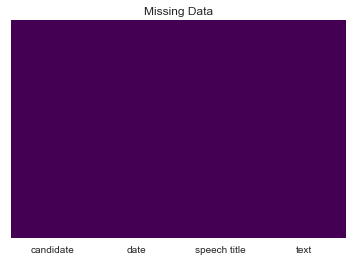

In [29]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Data')

In [32]:
len(df.candidate.unique())

48

In [33]:
df.candidate.unique()

array(['Robert Dole', 'George Bush', 'Jack Kemp', 'William J. Clinton',
       'George W. Bush', 'Albert Gore, Jr.', 'John McCain',
       'John Edwards', 'John F. Kerry', 'Barack Obama', 'Bill Richardson',
       'Hillary Clinton', 'Mitt Romney', 'Joe Biden', 'Mike Huckabee',
       'Christopher Dodd', 'Rudy Giuliani', 'Fred Thompson', 'Ron Paul',
       'Sarah Palin', 'Joseph Lieberman', 'Newt Gingrich', 'Herman Cain',
       'Tim Pawlenty', 'Rick Santorum', 'Jon Huntsman',
       'Michele Bachmann', 'Rick Perry', 'Paul Ryan', 'Ted Cruz',
       'Rand Paul', 'Marco Rubio', 'Bernie Sanders', 'Ben Carson',
       'Carly Fiorina', 'George Pataki', "Martin O'Malley",
       'Lindsey Graham', 'Lincoln Chafee', 'Jeb Bush', 'Donald J. Trump',
       'Bobby Jindal', 'Chris Christie', 'Scott Walker', 'Jim Webb',
       'John Kasich', 'Mike Pence', 'Tim Kaine'], dtype=object)

In [43]:
# create a won primary column
df['won_nomination']=np.where((df.candidate=='Robert Dole')|(df.candidate=='George Bush')|
                              (df.candidate=='William J. Clinton')|(df.candidate=='George W. Bush')|(df.candidate=='Albert Gore, Jr.')|
                              (df.candidate=='John McCain')|(df.candidate=='John F. Kerry')|(df.candidate=='Barack Obama')|
                              (df.candidate=='Hillary Clinton')|(df.candidate=='Mitt Romney')|(df.candidate=='Donald J. Trump'),1,0)
                              
                              
                              
                              

In [34]:
# create a political party column
df['party']=np.where((df.candidate=='Tim Kaine')|(df.candidate=='Joseph Lieberman')|(df.candidate=='John F. Kerry')|(df.candidate=='Albert Gore, Jr.')|(df.candidate=='William J. Clinton')|(df.candidate=='Hillary Clinton')|(df.candidate=='Bill Richardson')|(df.candidate=='Barack Obama')|(df.candidate=='John Edwards')|(df.candidate=='Christopher Dodd')|(df.candidate=='Joe Biden')|(df.candidate=='Bernie Sanders')|(df.candidate=="Martin O'Malley")|(df.candidate=="Lincoln Chafee")|(df.candidate=="Jim Webb"),'Democrat','Republican')


In [49]:
df[(df.candidate=="Martin O'Malley")].head()

,candidate,date,speech title,text,party,won_nomination
1465,Martin O'Malley,2015-05-30,Remarks Announcing Candidacy for President in ...,My fellow Americans. I want to talk with you t...,Democrat,0
1478,Martin O'Malley,2015-06-21,Remarks at the United States Conference of May...,It is so good to be back here among great frie...,Democrat,0
1480,Martin O'Malley,2015-06-25,Remarks at the TruCon15 Conference in Washingt...,I. Introduction Thank you for having me here t...,Democrat,0
1487,Martin O'Malley,2015-07-13,Remarks at the National Council of La Raza Con...,It is such a pleasure to be here with you. Tha...,Democrat,0
1489,Martin O'Malley,2015-07-17,Remarks at the Iowa Democratic Party Hall of F...,"My name is Martin O'Malley, I am running for P...",Democrat,0


In [82]:
#1996 campaign
campaign_1996=df[(df['date'] > '1995-01-01') & (df['date'] < '1997-12-01')]
campaign_1996.head()

,candidate,date,speech title,text,party,won_nomination
0,Robert Dole,1995-04-10,Remarks Announcing Candidacy for the Republica...,"Thank you, Governor Graves, Senator Kassebaum....",Republican,1
1,Robert Dole,1995-05-31,"Remarks in Los Angeles: ""Hollywood Speech""",I want to talk about a specific matter tonight...,Republican,1
2,Robert Dole,1995-06-17,Remarks to the United States Conference of May...,"Thank you, Senator Kempthorne, and thank you a...",Republican,1
3,Robert Dole,1995-08-19,Remarks at the Iowa Straw Poll in Ames,"Thank you, Dan Quayle , for that great introdu...",Republican,1
4,Robert Dole,1995-09-04,Remarks at the American Legion Convention in I...,"Thank you, and thank you very much, Commander ...",Republican,1


In [81]:
# 2000 campaign
campaign_2000=df[(df['date'] > '1999-01-01') & (df['date'] < '2001-12-01')]
campaign_2000.head()

,candidate,date,speech title,text,party,won_nomination
87,George W. Bush,1999-06-12,Remarks Announcing Candidacy for the Republica...,"What a pleasure it is to visit with you, to sh...",Republican,1
88,"Albert Gore, Jr.",1999-06-16,Remarks Announcing Candidacy for the Democrati...,"To my beloved family, to Tipper, to the people...",Democrat,1
89,"Albert Gore, Jr.",2000-01-07,Remarks at Ebenezer Baptist Church in Atlanta,It is humbling to return to the Ebenezer Bapti...,Democrat,1
90,George W. Bush,2000-03-06,Remarks at the Simon Wiesenthal Center in Los ...,"It is a special honor to be with you today, an...",Republican,1
91,George W. Bush,2000-03-07,"Remarks in Austin Following the ""Super Tuesday...","Phyllis, thank you. Thank you for your dedicat...",Republican,1


In [80]:
# 2004 campaign
campaign_2004=df[(df['date'] > '2003-01-01') & (df['date'] < '2005-12-01')]
campaign_2004.head()

,candidate,date,speech title,text,party,won_nomination
111,John F. Kerry,2003-09-02,Address Announcing Candidacy for President of ...,"Thank you, Max Cleland for your friendship, yo...",Democrat,1
112,John Edwards,2003-09-16,Address Announcing Candidacy for President of ...,"Good morning. Welcome to my hometown, Robbins,...",Democrat,0
113,John F. Kerry,2004-03-02,Address to the Greater Bethlehem Temple Church...,Good morning and thank you for inviting me int...,Democrat,1
114,John F. Kerry,2004-03-08,"Remarks in Des Moines, Iowa",We are here tonight to honor our next generati...,Democrat,1
115,John F. Kerry,2004-03-09,"Remarks Following the Florida, Louisiana, Miss...","Today, from Florida to Mississippi, to Louisia...",Democrat,1


In [79]:
# 2008 campaign
campaign_2008=df[(df['date'] > '2006-01-01') & (df['date'] < '2009-12-01')]
campaign_2008.head()

,candidate,date,speech title,text,party,won_nomination
209,John McCain,2006-11-16,Speech to GOPAC,Thank you for this opportunity to talk about t...,Republican,1
210,John McCain,2006-11-16,Speech to the Federalist Society,"Thank you, Ted, for that kind introduction. I ...",Republican,1
211,Bill Richardson,2006-12-16,Iraq Speech to New Hampshire Democratic State ...,Thank you Kathy. You are a great State Chair. ...,Democrat,0
212,Hillary Clinton,2007-01-20,Video Transcript: Presidential Exploratory Com...,HILLARY CLINTON: I announced today that I am f...,Democrat,1
213,Hillary Clinton,2007-01-22,"Remarks in a ""Let the Conversation Begin Webcast""","SENATOR CLINTON: Hi, everyone, and welcome to ...",Democrat,1


In [78]:
# 2012 campaign

campaign_2012=df[(df['date'] > '2011-05-01') & (df['date'] < '2012-12-01')]
campaign_2012.head()

,candidate,date,speech title,text,party,won_nomination
956,Barack Obama,2011-05-10,Remarks at a Democratic National Committee Fun...,"The President. Hello, Austin! Thank you. Thank...",Democrat,1
957,Barack Obama,2011-05-10,Remarks at a Democratic National Committee Fun...,"Let me, first of all--I'd like to hire Alexa a...",Democrat,1
958,Newt Gingrich,2011-05-11,Video Remarks Announcing Candidacy for President,I'm Newt Gingrich and I'm announcing my candid...,Republican,0
959,Ron Paul,2011-05-13,Remarks Announcing Candidacy for President in ...,"Thank you very much, thank you, thank you. Tha...",Republican,0
960,Barack Obama,2011-05-16,Remarks at a Democratic National Committee Fun...,"Thank you, everybody. Thank you. Well, it is w...",Democrat,1


In [89]:
# 2016 campaign
campaign_2016=df[(df['date'] > '2015-01-01') & (df['date'] < '2016-12-01')]
campaign_2016

,candidate,date,speech title,text,party,won_nomination
1433,Barack Obama,2015-02-13,Remarks at Democratic National Committee Fundr...,"Thank you, everybody. Well, first of all, let ...",Democrat,1
1434,Ted Cruz,2015-03-23,Remarks Announcing Candidacy for President at ...,Good to see you. [applause] Thank you. [applau...,Republican,0
1435,Rand Paul,2015-04-07,Remarks Announcing Candidacy for President in ...,"I have a message, a message that is loud and c...",Republican,0
1436,Hillary Clinton,2015-04-12,Video Remarks Announcing Candidacy for President,Unidentified Female: I'm getting ready for a l...,Democrat,1
1437,Marco Rubio,2015-04-13,Remarks Announcing Candidacy for President in ...,Thank you. After months of deliberation and pr...,Republican,0
1438,Marco Rubio,2015-04-14,Interview with Jake Tapper of CNN,"Tapper: And here now, newly declared Republica...",Republican,0
1439,Hillary Clinton,2015-04-14,Remarks in a Question and Answer Session at Ki...,[joined in progress] [unknown student speaker]...,Democrat,1
1440,Marco Rubio,2015-04-17,Remarks at the First in the Nation Republican ...,Rubio: Thank you. It's an honor to be here. Th...,Republican,0
1441,Rand Paul,2015-04-18,Remarks at the First in the Nation Republican ...,[joined in progress] Paul: ...sometimes people...,Republican,0
1442,Ted Cruz,2015-04-18,Remarks at the First in the Nation Republican ...,"Cruz: Thank you. Good to see you. Well, God bl...",Republican,0


In [90]:
campaign_speeches=pd.concat([campaign_1996,campaign_2000,campaign_2004,campaign_2008,campaign_2012,campaign_2016],axis=0)
campaign_speeches.shape

(1692, 6)

In [91]:
campaign_speeches.tail()

,candidate,date,speech title,text,party,won_nomination
1751,Hillary Clinton,2016-11-07,Remarks at North Carolina State University in ...,Thank you all! Whoa! Thank you! Thank you. Wel...,Democrat,1
1752,Hillary Clinton,2016-11-07,Remarks at the University of Pittsburgh,"Hello, Pittsburgh! Woah! Hello back there! Tha...",Democrat,1
1753,Donald J. Trump,2016-11-07,"Remarks at J.S Dorton Arena in Raleigh, North ...",This is amazing. What a great place. Thank you...,Republican,1
1754,Donald J. Trump,2016-11-09,Remarks in New York City Accepting Election as...,"Thank you. Thank you very much, everyone. [app...",Republican,1
1755,Hillary Clinton,2016-11-09,Remarks in New York City Conceding the 2016 Pr...,"Senator Tim Kaine: My wife, Anne, and I are so...",Democrat,1


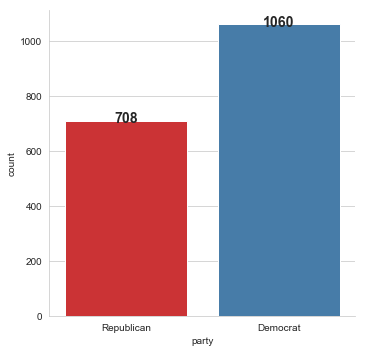

In [96]:
plot = sns.catplot(x="party", kind="count", data=df,palette='Set1')

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i,  # bar index (x coordinate of text)
        h+10,  # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center',
        va='center',
        fontweight='bold',
        size=14)

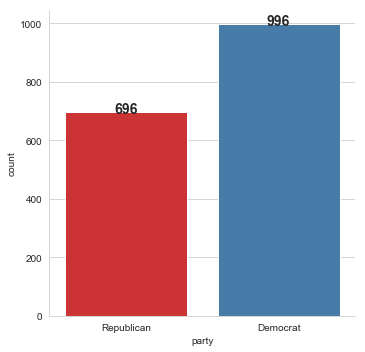

In [97]:
plot = sns.catplot(x="party", kind="count", data=campaign_speeches,palette='Set1')

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i,  # bar index (x coordinate of text)
        h+10,  # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center',
        va='center',
        fontweight='bold',
        size=14)

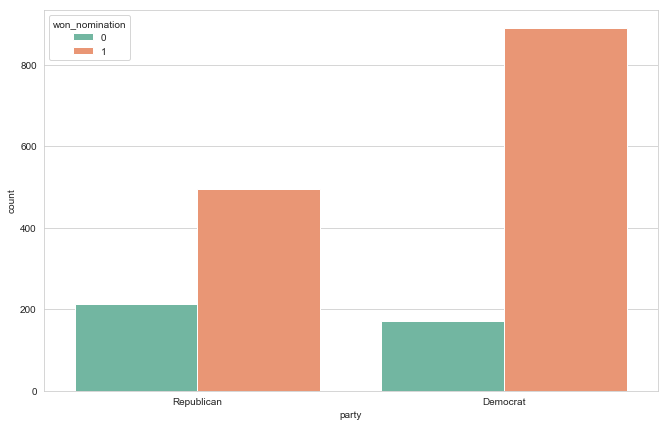

In [94]:
plt.figure(figsize=(11,7))
sns.countplot(x='party',hue='won_nomination',data=df,palette="Set2")

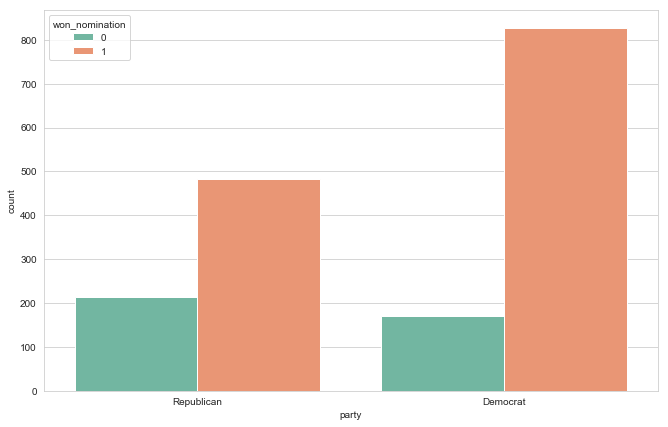

In [95]:
plt.figure(figsize=(11,7))
sns.countplot(x='party',hue='won_nomination',data=campaign_speeches,palette="Set2")

In [98]:
campaign_speeches.won_nomination.value_counts()

1    1308
0     384
Name: won_nomination, dtype: int64

In [102]:
Obama_Speeches=campaign_speeches[(campaign_speeches.candidate=='Barack Obama')].reset_index(drop=True)

In [104]:
Obama_Speeches.to_csv('Obama Speeches', index=False)

In [107]:
Obama_Speeches.head()

,candidate,date,speech title,text,party,won_nomination
0,Barack Obama,2004-07-27,Keynote Address at the 2004 Democratic Nationa...,"On behalf of the great state of Illinois, cros...",Democrat,1
1,Barack Obama,2007-02-10,Remarks Announcing Candidacy for President in ...,Let me begin by saying thanks to all you who'v...,Democrat,1
2,Barack Obama,2007-03-02,Remarks at the AIPAC Policy Forum in Chicago,Thank you so much for your kind introduction a...,Democrat,1
3,Barack Obama,2007-03-04,Remarks at the Selma Voting Rights March Comme...,"Here today, I must begin because at the Unity ...",Democrat,1
4,Barack Obama,2007-04-23,Remarks to the Chicago Council on Global Affairs,Good morning. We all know that these are not t...,Democrat,1


In [109]:
import spacy
import en_core_web_sm
from spacy.lang.en.stop_words import STOP_WORDS
import string
from spacy.lang.en import English

nlp = en_core_web_sm.load()

In [110]:
# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

In [111]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [word.lemma_.lower().strip() if word.lemma_ !=
                "-PRON-" else word.lower_ for word in mytokens]

    # Removing stop words
    mytokens = [
        word for word in mytokens if word not in stop_words and word not in punctuations]

    # return preprocessed list of tokens
    return mytokens

In [112]:
Obama_Speeches['tokenized_text']=Obama_Speeches.text.apply(lambda x: spacy_tokenizer(x))

In [537]:
doc = nlp(Obama_Speeches.text[0])

In [545]:
# get all tags
all_tags = {w.pos: w.pos_ for w in doc}
all_tags

{100: 'VERB', 95: 'PRON', 85: 'ADP', 92: 'NOUN', 90: 'DET', 97: 'PUNCT', 86: 'ADV', 89: 'CCONJ', 84: 'ADJ', 94: 'PART', 93: 'NUM', 96: 'PROPN', 99: 'SYM', 87: 'AUX'}

In [549]:
# all tags of first sentence of our document
for word in list(doc.sents)[0]:
    print (word, word.tag_)

Let VB
me PRP
begin VB
by IN
saying VBG
thanks NNS
to IN
all DT
you PRP
who WP
've VB
traveled VBN
, ,
from IN
far RB
and CC
wide JJ
, ,
to TO
brave VB
the DT
cold JJ
today NN
. .


In [113]:
# define some parameters
noisy_pos_tags = ['PROPN']
min_token_length = 2

# Function to check if the token is a noise or not

def isNoise(token):
    is_noise = False
    if token.pos_ in noisy_pos_tags:
        is_noise = True
    elif token.is_stop == True:
        is_noise = True
    elif len(token.string) <= min_token_length:
        is_noise = True
    return is_noise


def cleanup(token, lower=True):
    if lower:
        token = token.lower()
    return token.strip()

In [555]:
# top unigrams used 
from collections import Counter
cleaned_list = [cleanup(word.string) for word in doc if not isNoise(word)]
Counter(cleaned_list) .most_common(5)

[('let', 28), ('people', 13), ('know', 12), ('work', 12), ('today', 11)]

In [569]:
labels = set([w.label_ for w in doc.ents])
for label in labels:
    entities = [cleanup(e.string, lower=False)
                for e in doc.ents if label == e.label_]
    entities = list(set(entities))
    print (label, entities)

DATE ['today', 'two decades ago', 'three years', 'March of 2008', 'years', 'September day', 'Today', 'this year', 'the last six years', 'every four years']
LOC ['North and South', 'Earth', 'West', 'East', 'Katrina']
FAC ['the Old State Capitol']
MONEY ['13,000']
EVENT ['Depression', 'Watergate']
ORDINAL ['first']
QUANTITY ['a thousand miles']
PERSON ['Dick Lugar', 'Abraham Lincoln']
ORG ['Congress', 'Lincoln']
CARDINAL ['one', 'four', 'ten', 'millions']
GPE ['Springfield', 'Chicago', 'America', 'North, South', 'Iraq', 'the United States', 'Illinois', 'Empire', 'Washington']
NORP ['Sunni', 'Republican', 'Shia', 'American', 'Americans', 'Christian', 'Iraqis']


In [620]:
displacy.serve(doc, style="ent")

/anaconda3/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  "__main__", mod_spec)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [621]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)


today 95 100 DATE
one 511 514 CARDINAL
today 615 620 DATE
Illinois 736 744 GPE
two decades ago 750 765 DATE
Chicago 836 843 GPE
13,000 961 967 MONEY
America 1118 1125 GPE
Chicago 1154 1161 GPE
a thousand miles 1540 1556 QUANTITY
Christian 1782 1791 NORP
three years 1805 1816 DATE
Springfield 2245 2256 GPE
America 2282 2289 GPE
today 2528 2533 DATE
Springfield 3139 3150 GPE
North, South 3158 3170 GPE
East 3172 3176 LOC
West 3181 3185 LOC
American 3252 3260 NORP
America 3349 3356 GPE
the Old State Capitol 3392 3413 FAC
Lincoln 3421 3428 ORG
today 3542 3547 DATE
the United States 3590 3607 GPE
Washington 3760 3770 GPE
Washington 3829 3839 GPE
Empire 4069 4075 GPE
Depression 4178 4188 EVENT
millions 4228 4236 CARDINAL
Today 4543 4548 DATE
Abraham Lincoln 4759 4774 PERSON
millions 4948 4956 CARDINAL
North and South 5013 5028 LOC
Lincoln 5156 5163 ORG
today 5187 5192 DATE
one 5267 5270 CARDINAL
Americans 5283 5292 NORP
today 5335 5340 DATE
years 5610 5615 DATE
the last six years 6052 6070 DA

In [651]:
def produce_plot(result, fig_name, kind):
    """Save plot of result
    Parameters:
    result: data to draw
    fig_name: figure name
    kind: type of data used to plot
    """
    
    plt.bar(["\"{}\"".format(i[0]) for i in result], [i[1] for i in result])
    plt.ylabel('total')
    plt.xlabel('term')
    plt.xticks(rotation=45, fontsize=12)
    plt.title("Top {}{} ({})".format(kind, 's', fig_name.title()))
    plt.subplots_adjust(bottom=0.30)
    plt.show()
    plt.close()

In [652]:
def top_pos(doc, pos, n, fig_name=""):
    """Finds the top n spaCy pos

    Parameters:
    doc: spaCy's doc
    pos: pos we are interesting in finding; one of "VERB", "NOUN", "ADJ" or "ADV"
    n: how many pos
    fig_name: name of the plot
    """
    
    pos_count = {}
    for token in doc:
        # ignore stop words
        if token.is_stop:
            continue

        if token.pos_== pos:
            if token.lemma_ in pos_count:
                pos_count[token.lemma_] += 1
            else:
                pos_count[token.lemma_] = 1

    # sort by values, but before get only those keys where value > 1;
    # I want lemmas that appear more than one
    # lastly, get the first n results
    result = sorted({k: v for (k, v) in pos_count.items() if v > 1}.items(),
                    key=lambda kv: kv[1], reverse=True)[:n]

    print("top 10 {} {}".format(pos, result))
    produce_plot(result, fig_name, pos)

top 10 NOUN [('people', 13), ('generation', 13), ('today', 11), ('time', 11), ('country', 7), ('face', 7), ('war', 7), ('year', 7), ('heart', 6), ('hope', 6)]


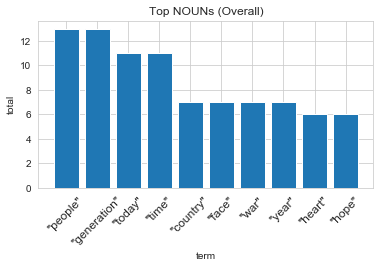

In [653]:
top_pos(doc, 'NOUN', 10, "overall")

top 10 ADJ [('well', 6), ('possible', 4), ('good', 4), ('able', 3), ('common', 3), ('new', 3), ('young', 2), ('single', 2), ('civil', 2), ('willing', 2)]


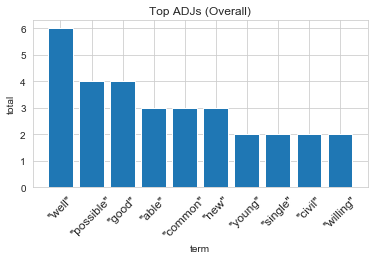

In [654]:
top_pos(doc, 'ADJ', 10, "overall")

top 10 VERB [('let', 29), ('know', 13), ('tell', 12), ('work', 10), ('come', 9), ('believe', 7), ('bring', 6), ('need', 6), ('build', 5), ('turn', 5)]


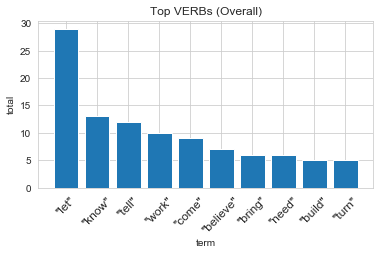

In [655]:
top_pos(doc, 'VERB', 10, "overall")

In [114]:
def top_entities(doc, n,):
    """Finds the top n spaCy entities
    Parameters:
    doc: spaCy's doc
    n: how many entities
    fig_name: name of the plot
    """
    
    entities = {}
    # named entities
    for ent in doc.ents:
        # Print the entity text and its label
        if ent.text in entities:
            entities[ent.text] += 1
        else:
            entities[ent.text] = 1
    result = sorted(entities.items(), key=lambda kv: kv[1], reverse=True)[:n]
    print("top 10 entities {}".format(result))

    plt.barh(["\"{}\"".format(i[0]) for i in result], [i[1] for i in result])
    plt.ylabel('total')
    plt.xlabel('named entity')
    plt.xticks(rotation='horizontal', fontsize=10)
    plt.title("Top {} named entities".format(n))
    plt.subplots_adjust(bottom=0.40)
    plt.show()
    plt.close()

top 10 entities [('today', 9), ('America', 9), ('one', 4), ('millions', 4), ('Springfield', 3), ('Lincoln', 3), ('Washington', 3), ('Americans', 3), ('Chicago', 2), ('American', 2)]


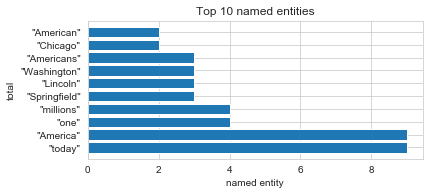

In [649]:
top_entities(doc,10)

In [687]:
phrases=[np.text for np in doc.noun_chunks]
counter = Counter(phrases)
print(counter.most_common(20))

[('we', 48), ('I', 43), ('us', 27), ('you', 21), ("'s", 16), ('We', 13), ('It', 12), ('they', 10), ('what', 9), ('it', 9), ('the generation', 9), ('me', 7), ('who', 7), ('the face', 7), ('them', 7), ('people', 6), ('He', 6), ('America', 5), ('time', 5), ('hope', 3)]
